In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import norm

In [55]:
df =pd.read_csv("train_Insurance.csv")
df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [56]:
print(len(df))
df.head()

5012


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [57]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [58]:
print("le nombre total des valeurs null est", df.isnull().sum().sum())
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())

le nombre total des valeurs null est 154

 le nombre des valeurs null pour chaque attribut=  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64


In [59]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim'],
      dtype='object')

In [60]:
dfS=df[[ 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim']]
dfS

,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,V,V,U,550.0,Ordinary,without,33063,oui
5008,2012,0.5,0,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,N,O,R,536.0,Fire-resistive,4,74243,non


In [61]:
dfS.info()
dfS.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   5012 non-null   int64  
 1   Insured_Period      5012 non-null   float64
 2   Residential         5012 non-null   int64  
 3   Building_Fenced     5012 non-null   object 
 4   Garden              5008 non-null   object 
 5   Settlement          5012 non-null   object 
 6   Building Dimension  4935 non-null   float64
 7   Building_Type       5012 non-null   object 
 8   NumberOfWindows     5012 non-null   object 
 9   Geo_Code            4939 non-null   object 
 10  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 430.8+ KB


,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012.000000,5012.000000,5012.000000,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,NaN,NaN,NaN,2,2,2,NaN,4,11,1115,2
top,NaN,NaN,NaN,N,O,R,NaN,Non-combustible,without,6088,non
freq,NaN,NaN,NaN,2535,2532,2537,NaN,2310,2476,102,3886
mean,2013.660215,0.869713,0.301077,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,1.383134,0.219496,0.458772,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,2012.000000,0.500000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2012.000000,0.500000,0.000000,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,2013.000000,1.000000,0.000000,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,2015.000000,1.000000,1.000000,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'YearOfObservation'}>,
        <Axes: title={'center': 'Insured_Period'}>],
       [<Axes: title={'center': 'Residential'}>,
        <Axes: title={'center': 'Building Dimension'}>]], dtype=object)

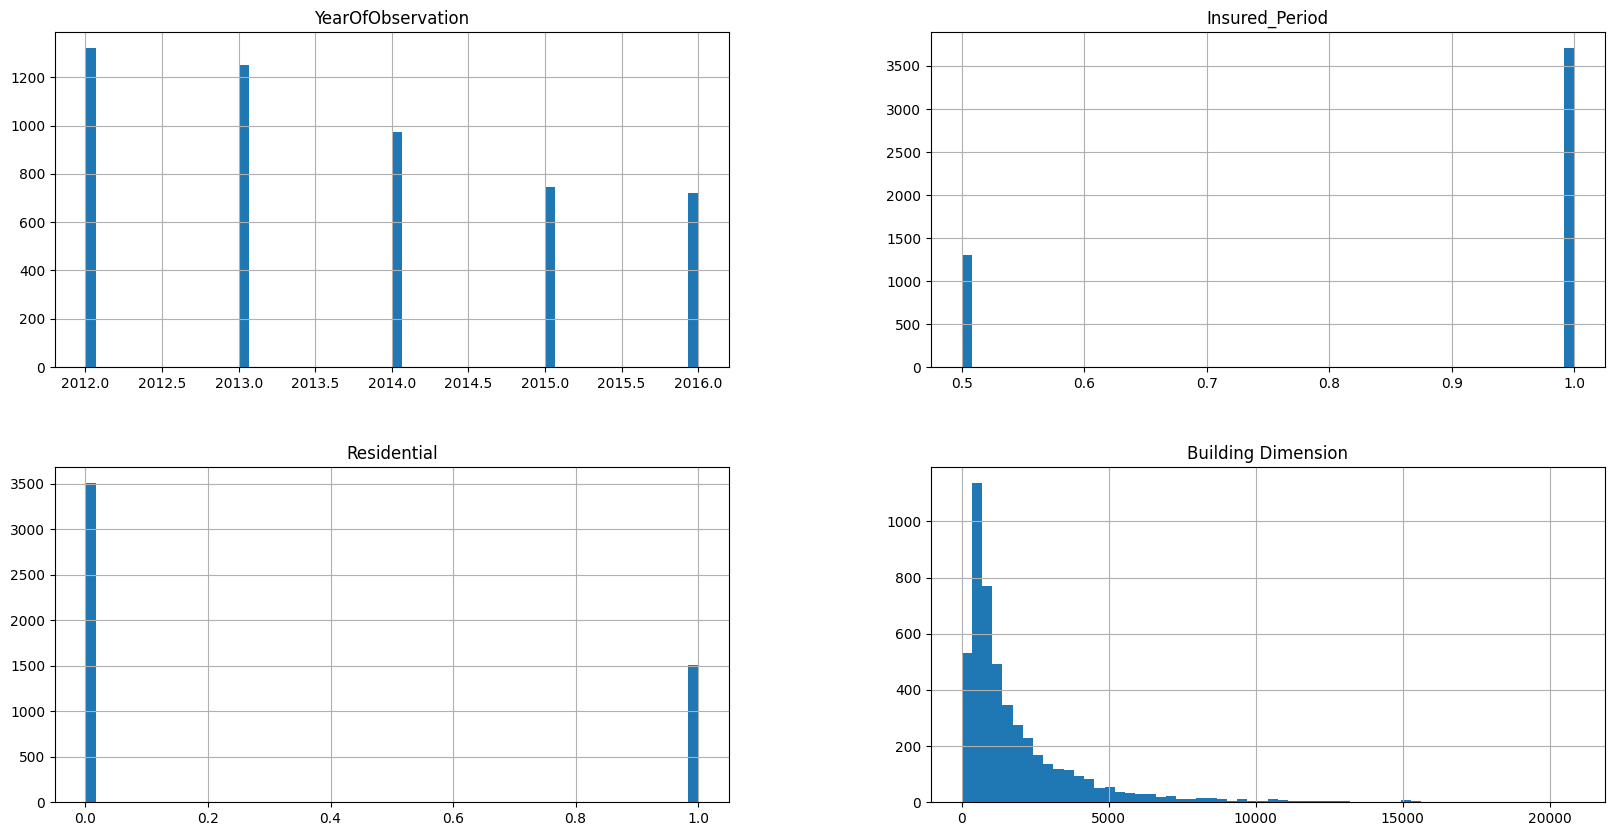

In [62]:
dfS.hist(bins=60,figsize=(20,10))

In [63]:
dfS.duplicated().sum()
dfS['NumberOfWindows'] = dfS['NumberOfWindows'].replace('without', 0)
dfS


C:\Users\user\AppData\Local\Temp\ipykernel_18208\4039839389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['NumberOfWindows'] = dfS['NumberOfWindows'].replace('without', 0)


,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,V,V,U,1240.0,Wood-framed,0,75117,non
1,2012,1.0,0,V,V,U,900.0,Non-combustible,0,62916,non
2,2013,1.0,1,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,V,V,U,600.0,Wood-framed,0,6012,oui
4,2012,1.0,0,V,V,U,900.0,Non-combustible,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,V,V,U,550.0,Ordinary,0,33063,oui
5008,2012,0.5,0,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,N,O,R,536.0,Fire-resistive,4,74243,non


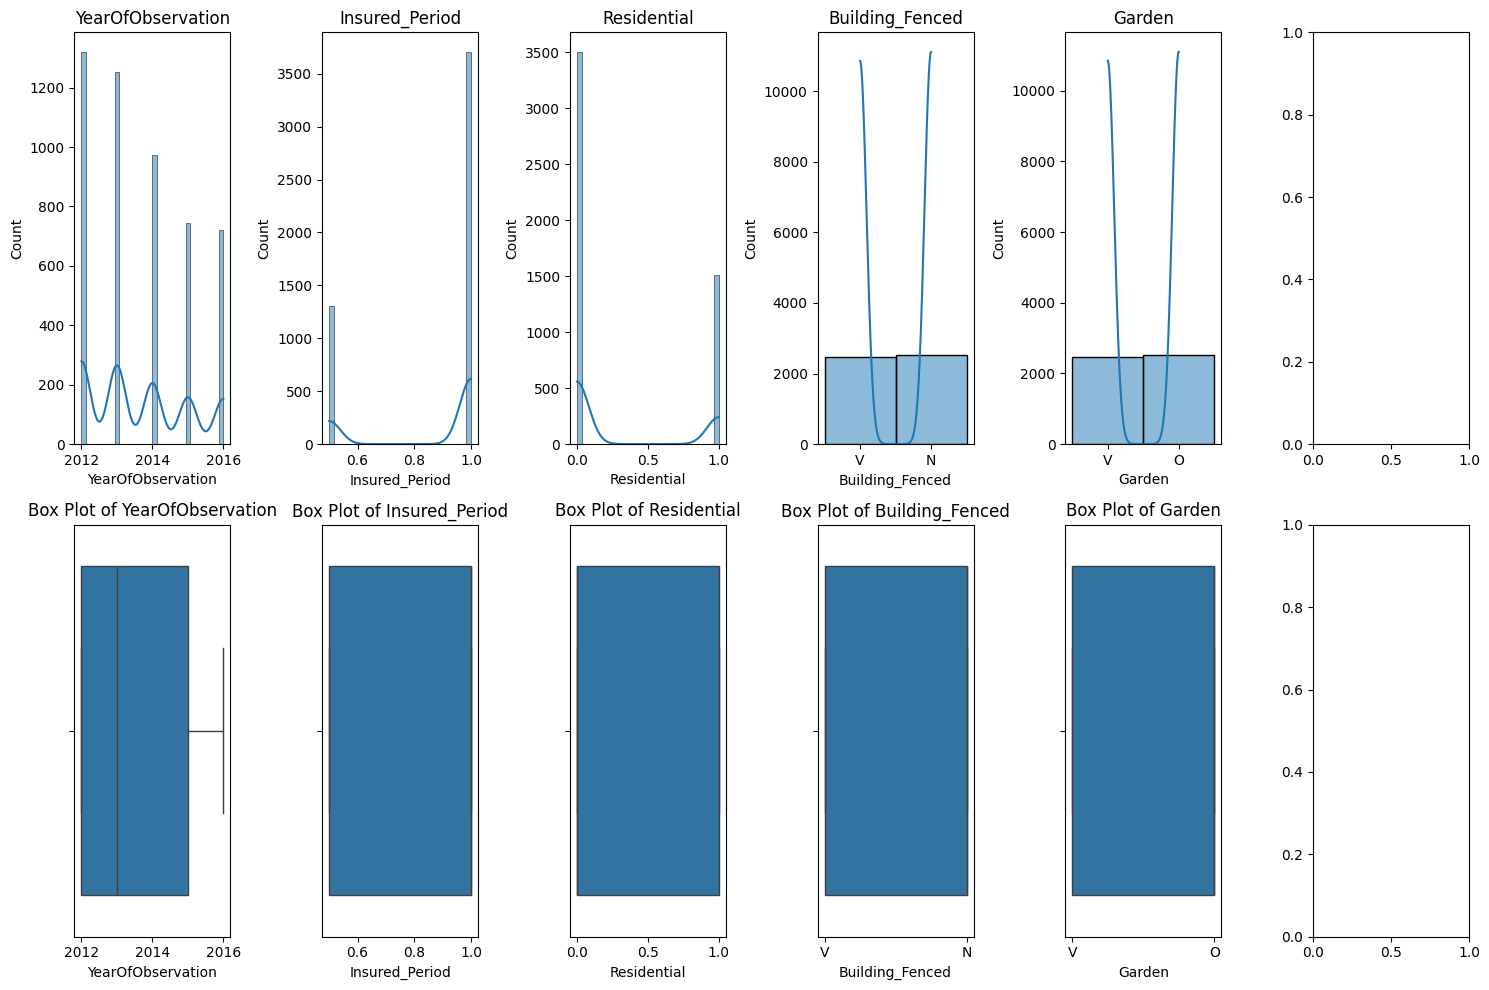

In [64]:
df = dfS.iloc[:, 0:5]
#df["NumberOfWindows"]=dfS["NumberOfWindows"]
fig, axs = plt.subplots(2, 6, figsize=(15, 10))  # Adjusted figsize for better visibility

for i in range(df.shape[1]):  # Loop through the number of columns in df
    # Histogram
    sns.histplot(df.iloc[:, i], bins=30, kde=True, ax=axs[0, i])  # Plot each column
    axs[0, i].set_title(df.columns[i])  # Set title for each histogram

    # Box Plot
    sns.boxplot(x=df.iloc[:, i], ax=axs[1, i])
    axs[1, i].set_title(f'Box Plot of {df.columns[i]}')  # Set title for each box plot

# Hide unused subplots (if any)
for j in range(df.shape[1], 4):  # Hide any unused subplots in the grid
    axs[0, j].axis('off')
    axs[1, j].axis('off')

plt.tight_layout()
plt.show()

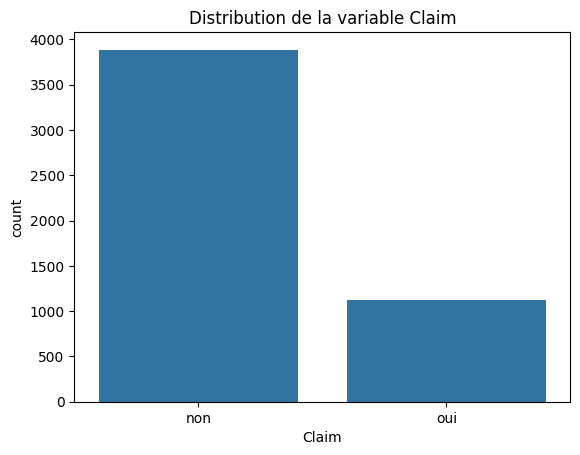

In [65]:
sns.countplot(x='Claim', data=dfS)
plt.title('Distribution de la variable Claim')
plt.show()


In [66]:
dfS['NumberOfWindows'] = dfS['NumberOfWindows'].replace('without', 0)
dfS


C:\Users\user\AppData\Local\Temp\ipykernel_18208\1059303545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['NumberOfWindows'] = dfS['NumberOfWindows'].replace('without', 0)


,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,V,V,U,1240.0,Wood-framed,0,75117,non
1,2012,1.0,0,V,V,U,900.0,Non-combustible,0,62916,non
2,2013,1.0,1,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,V,V,U,600.0,Wood-framed,0,6012,oui
4,2012,1.0,0,V,V,U,900.0,Non-combustible,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,V,V,U,550.0,Ordinary,0,33063,oui
5008,2012,0.5,0,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,N,O,R,536.0,Fire-resistive,4,74243,non


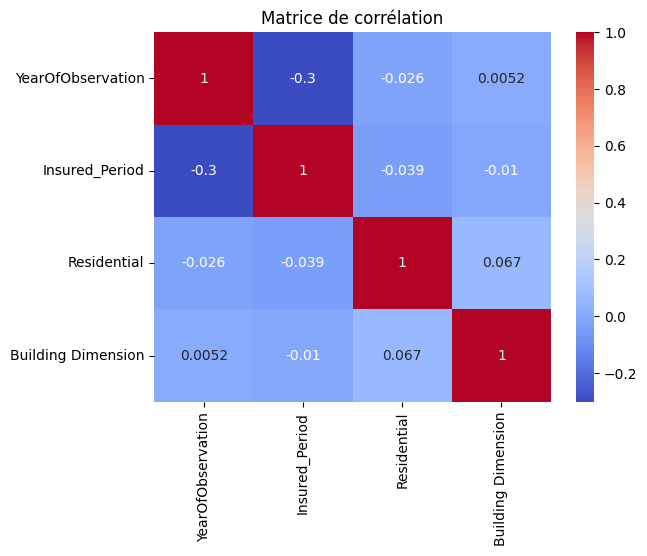

In [67]:
dfN = dfS.select_dtypes(include=[float, int])
correlation_matrix = dfN.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

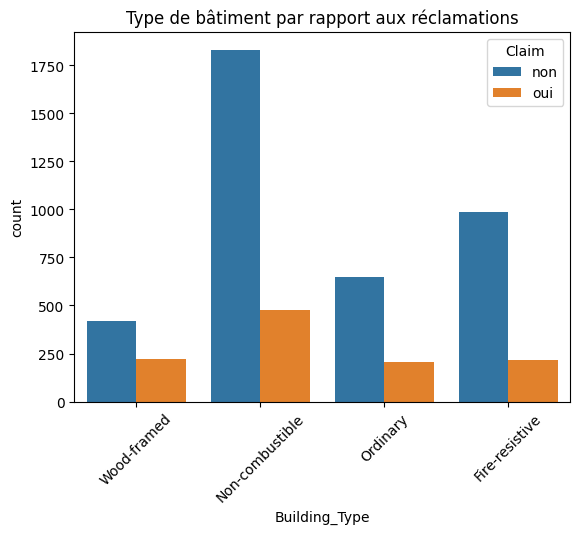

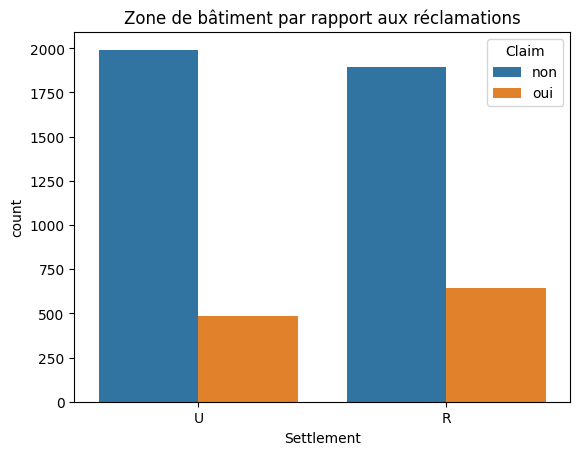

In [68]:
sns.countplot(x='Building_Type', hue='Claim', data=dfS)
plt.title('Type de bâtiment par rapport aux réclamations')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Settlement', hue='Claim', data=dfS)
plt.title('Zone de bâtiment par rapport aux réclamations')
plt.show()

In [69]:
dfS.describe(include='all')


,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012.000000,5012.000000,5012.000000,5012,5008,5012,4935.000000,5012,5012.0,4939,5012
unique,NaN,NaN,NaN,2,2,2,NaN,4,11.0,1115,2
top,NaN,NaN,NaN,N,O,R,NaN,Non-combustible,0.0,6088,non
freq,NaN,NaN,NaN,2535,2532,2537,NaN,2310,2476.0,102,3886
mean,2013.660215,0.869713,0.301077,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,1.383134,0.219496,0.458772,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,2012.000000,0.500000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2012.000000,0.500000,0.000000,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,2013.000000,1.000000,0.000000,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,2015.000000,1.000000,1.000000,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [70]:
print("\n le nombre des valeurs null pour chaque attribut= ",dfS.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  YearOfObservation      0
Insured_Period         0
Residential            0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64


In [71]:
dfS['Building Dimension'] = dfS['Building Dimension'].fillna(dfS['Building Dimension'].mean())
dfS['Garden'] = dfS['Garden'].fillna(dfS['Garden'].mode()[0])
dfS['NumberOfWindows'] = dfS['NumberOfWindows'].fillna(dfS['NumberOfWindows'].mode()[0])
dfS.dropna(subset=['Geo_Code'],inplace=True)




C:\Users\user\AppData\Local\Temp\ipykernel_18208\3082249282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['Building Dimension'] = dfS['Building Dimension'].fillna(dfS['Building Dimension'].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_18208\3082249282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['Garden'] = dfS['Garden'].fillna(dfS['Garden'].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_18208\3082249282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [72]:
print("\n le nombre des valeurs null pour chaque attribut= ",dfS.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  YearOfObservation     0
Insured_Period        0
Residential           0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_18208\521942265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS[feature] = pd.to_numeric(dfS[feature], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_18208\521942265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS[feature] = pd.to_numeric(dfS[feature], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_18208\521942265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

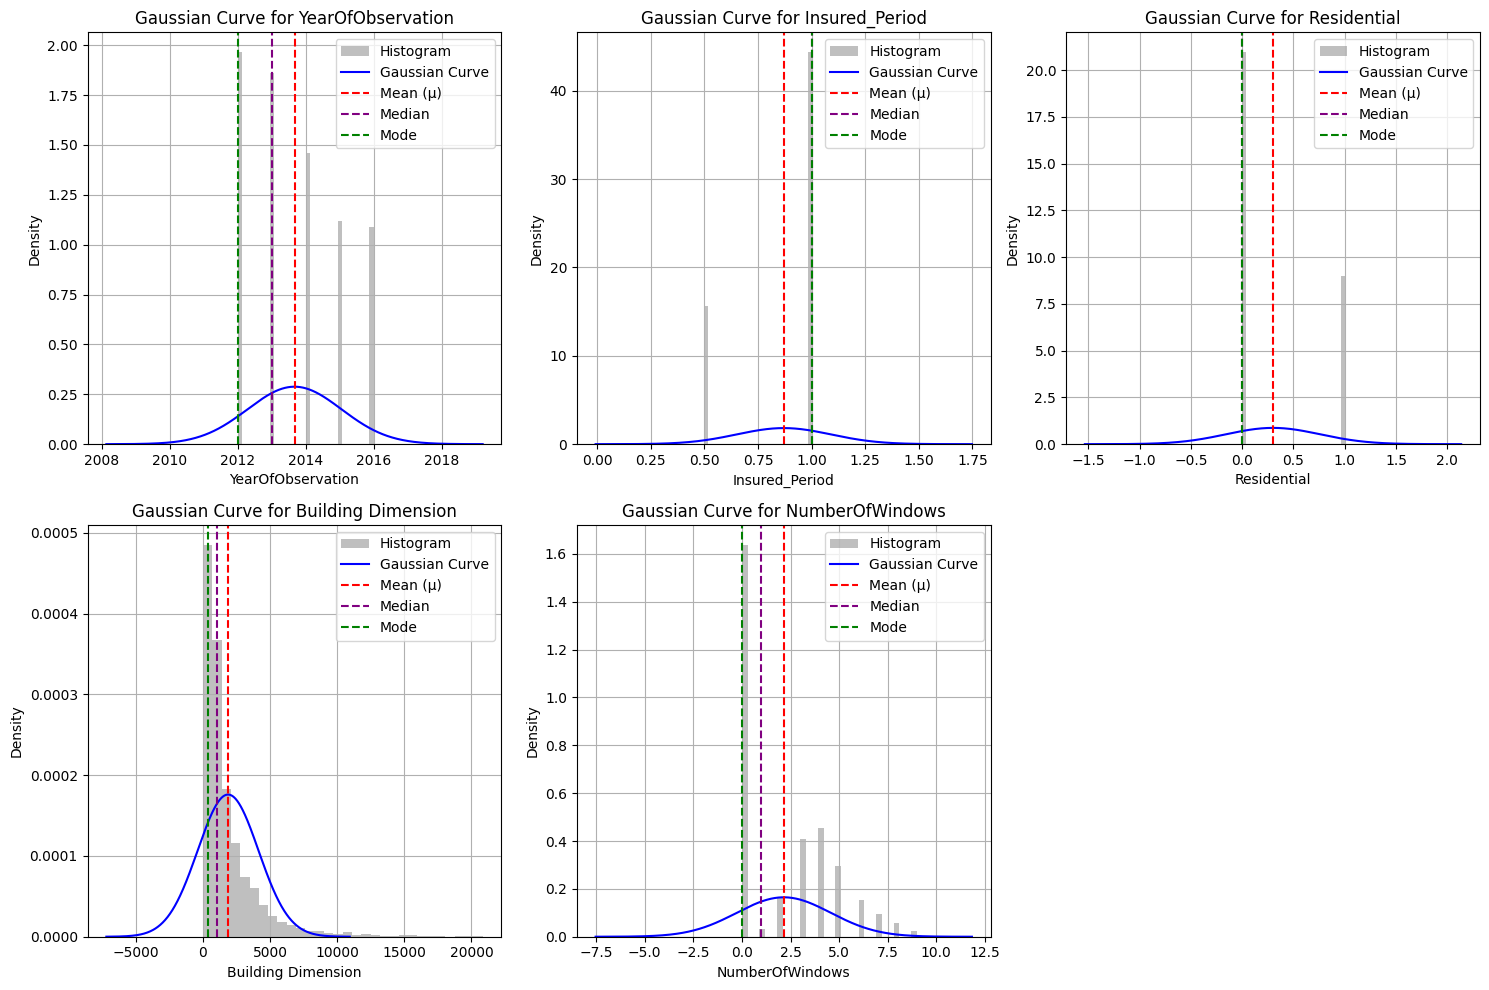

In [73]:
features = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create subplots
    
    # Convert the feature to numeric, setting errors='coerce' will turn non-numeric values into NaN
    dfS[feature] = pd.to_numeric(dfS[feature], errors='coerce')
    
    # Drop NaN values that resulted from conversion
    feature_data = dfS[feature].dropna()
    
    # Calculate mean, median, and mode
    mu = feature_data.mean()
    median = feature_data.median()
    mode = feature_data.mode()[0]  # Get the first mode value
    
    # Calculate standard deviation
    sigma = feature_data.std()

    # Generate values for the Gaussian curve
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Plot histogram and Gaussian curve
    plt.hist(feature_data, bins=30, density=True, alpha=0.5, color='gray', label='Histogram')
    plt.plot(x, y, label='Gaussian Curve', color='blue')
    
    # Plotting mean, median, and mode
    plt.axvline(mu, color='red', linestyle='--', label='Mean (μ)')
    plt.axvline(median, color='purple', linestyle='--', label='Median')
    plt.axvline(mode, color='green', linestyle='--', label='Mode')

    plt.title(f'Gaussian Curve for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid()

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [74]:
l_num = list(dfS.select_dtypes(include="number"))
l_discret = list (dfS.select_dtypes(include="object"))
print(l_num)
print(l_discret)

['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows']
['Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'Geo_Code', 'Claim']


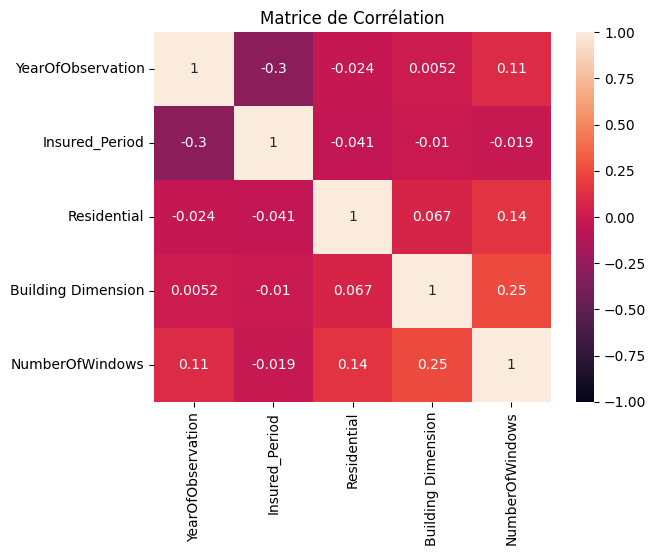

In [75]:
df_corr=dfS.corr(numeric_only=True)
sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

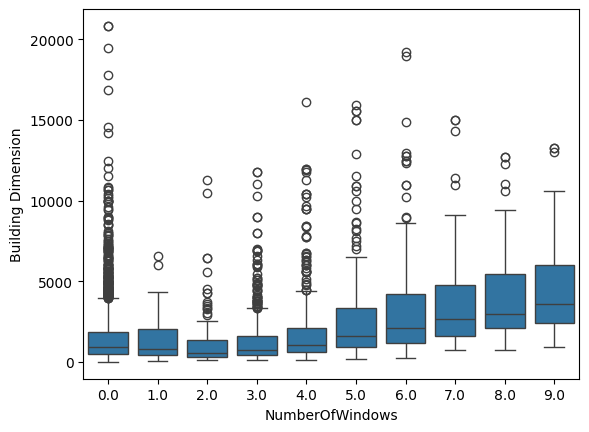

In [76]:
sns.boxplot(x='NumberOfWindows',y='Building Dimension',data=dfS)
plt.show()

In [77]:
a=dfS[dfS["NumberOfWindows"]==0]["Building Dimension"].median()
b=dfS[dfS["NumberOfWindows"]!=0]["Building Dimension"].median()
dfS['Building Dimension'].fillna(dfS['NumberOfWindows'].apply(lambda x: a if x == 0 else b), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_18208\1568786659.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfS['Building Dimension'].fillna(dfS['NumberOfWindows'].apply(lambda x: a if x == 0 else b), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18208\1568786659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS['Building 

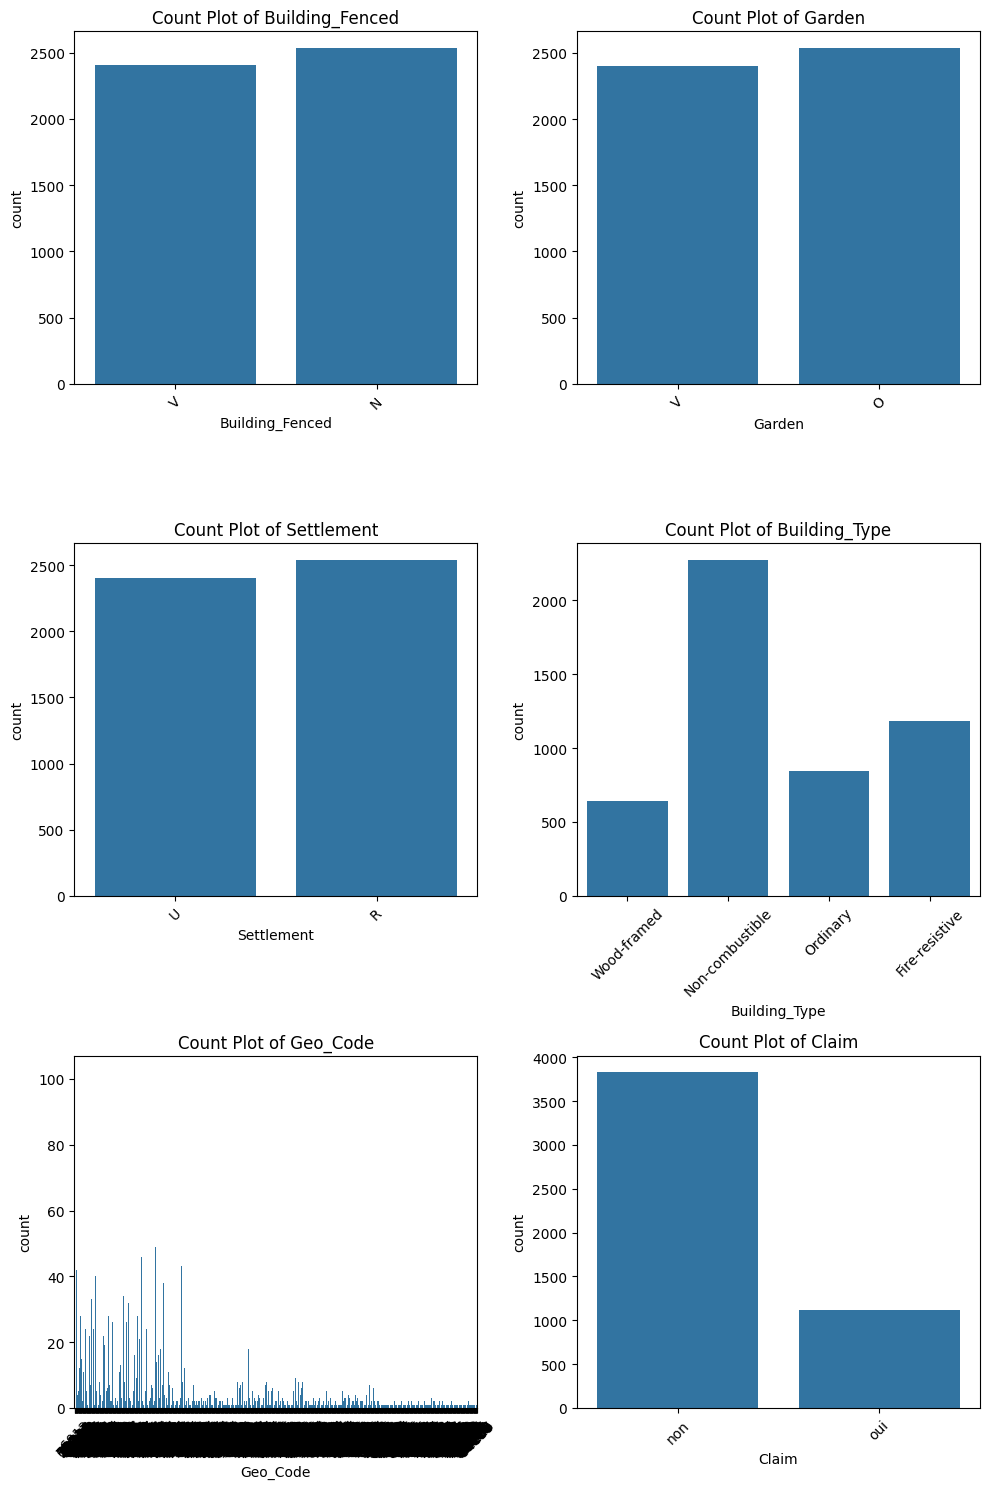

In [88]:
num_plots = len(l_discret)
cols = 2  # Set the number of columns you want
rows = (num_plots + cols - 1) // cols
plt.figure(figsize=(10, 5 * rows))

for i in range(num_plots):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=l_discret[i], data=dfS)
    plt.title(f'Count Plot of {l_discret[i]}')  # Add title for clarity
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

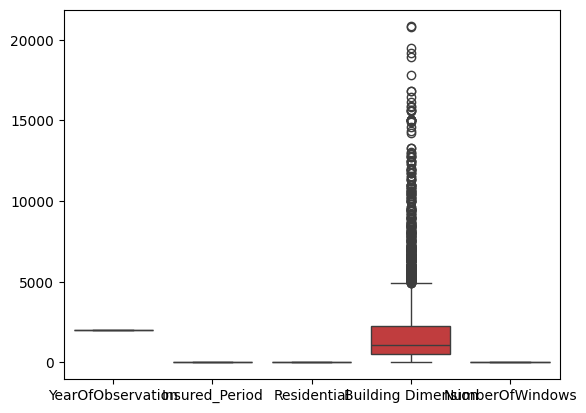

In [82]:
sns.boxplot(data=dfS[l_num])
plt.show()


In [84]:
def adjust_outliers(df, col):
 Q1,Q3=np.percentile(df[col], [25,75])
 IQR=Q3-Q1
 upper_limit=Q3+1.5*IQR
 lower_limit=Q1-1.5*IQR
 df[col]=np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit,df[col]))

In [86]:
adjust_outliers(dfS, "Building Dimension")
adjust_outliers(dfS, "YearOfObservation")
adjust_outliers(dfS, "Insured_Period")
adjust_outliers(dfS, "Residential")
adjust_outliers(dfS, "NumberOfWindows")

C:\Users\user\AppData\Local\Temp\ipykernel_18208\4276671407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit,df[col]))


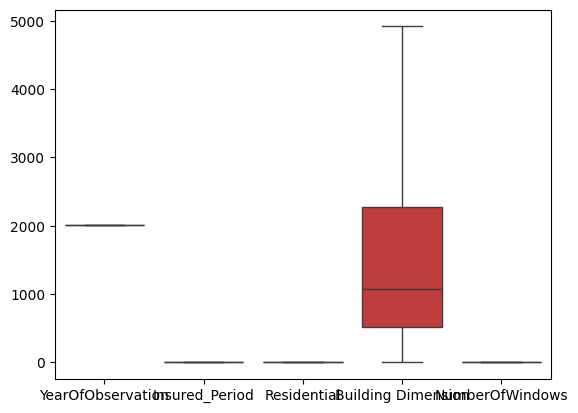

In [87]:
sns.boxplot(data=dfS[l_num])
plt.show()


In [90]:
enc = OrdinalEncoder()
dfS[['Building_Fenced',"Garden","Settlement"]]=enc.fit_transform(dfS.loc[:,['Building_Fenced',"Garden","Settlement"]])
dfS

C:\Users\user\AppData\Local\Temp\ipykernel_18208\497450140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS[['Building_Fenced',"Garden","Settlement"]]=enc.fit_transform(dfS.loc[:,['Building_Fenced',"Garden","Settlement"]])


,YearOfObservation,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012.0,1.0,1.0,1.0,1.0,1.0,1240.0,Wood-framed,0.0,75117,non
1,2012.0,1.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0.0,62916,non
2,2013.0,1.0,1.0,0.0,0.0,0.0,4918.5,Non-combustible,4.0,31149,oui
3,2016.0,0.5,0.0,1.0,1.0,1.0,600.0,Wood-framed,0.0,6012,oui
4,2012.0,1.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0.0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5006,2016.0,0.5,0.0,1.0,1.0,1.0,173.0,Non-combustible,0.0,21231,non
5007,2013.0,1.0,0.0,1.0,1.0,1.0,550.0,Ordinary,0.0,33063,oui
5008,2012.0,0.5,0.0,0.0,0.0,0.0,1000.0,Fire-resistive,4.0,13004,non
5009,2015.0,1.0,1.0,0.0,0.0,0.0,480.0,Ordinary,3.0,94059,non
